# A Web Service of Time Series of Earth Observation Data
<hr style="border:2px solid #0077b9;">

- Lubia Vinhas
- Gilberto Ribeiro
- Rolf Simoes
- Vitor Gomes
- Alber Sánchez *

<img src="http://www.inpe.br/noticias/arquivos/imagens/Logo_INPE_maior.jpg" alt="A data cube of satellite images is as an array" title="data cube" style = "position:absolute; top:250px; right:200px"/>

## Agenda
<hr style="border:2px solid #0077b9;">
- e-sensing project

- Web Time Series Service

- Python integration

# Before we start...
<hr style="border:2px solid #0077b9;">
- The code in this presentation is available as a Jupyter notebook
  - https://github.com/e-sensing/wgiss-py-webinar
  
  
- Jupyter notebooks: Interactive web pages for sharing text and code
  - https://jupyter.org/


# e-sensing project
<hr style="border:2px solid #0077b9;">
- Build a platform for handling big geospatial data

- Organize decades of satellite images into arrays

- Put together data and analysis

- For more information http://esensing.org/

## e-sensing data array
<hr style="border:1px solid #0077b9;">


Decades of satellite images can be organized into array data structures which can be efficiently queried and processed 

<img src="img/datacube.png" alt="A data cube of satellite images is as an array" title="data cube" height="600" width="800" />

## e-sensing architecture
<hr style="border:1px solid #0077b9;">


We put together data and analysis in order to help scientists to research land use and land cover change.

<img src="img/architecture.png" alt="e-sensing project's architecture " title="e-sensing architecture" height="550" width="700" />

## Notes on the e-sensing project

The e-sensing project is about developing new ways to extract information on land use and land cover change from big Earth Observation data sets. We address the following scientific question: 

***How can we use e-science methods and techniques to improve the extraction of land use and land cover change information from big Earth Observation data sets in an open and reproducible way?*** 

To answer this, our project is building a new generation of knowledge platform for handling big geospatial data. We're conceiving, building, and deploying a new type of knowledge platform for accessing, processing and analyzing big Earth Observation data.

The "e-sensing" project is supported by __[FAPESP](http://bv.fapesp.br/pt/auxilios/89598/e-sensing-analise-de-grandes-volumes-de-dados-de-observacao-da-terra-para-informacao-de-mudancas-de/)__, under the  __[e-science program](http://www.fapesp.br/8436)__ .

For additional information, please visits us at:

- our  __[official page](http://esensing.org/)__ 
- our code repository at __[github](https://github.com/e-sensing/)__
- our project at __[research gate](https://www.researchgate.net/project/e-sensing-big-earth-observation-data-analytics-for-land-use-and-land-cover-change-information-wwwesensingorg)__


# Web Time Series Service
<hr style="border:2px solid #0077b9;">
- Lightweight JSON web service
- Access remote sensing imagery
- WTSS lists, describes, and retrieves EO time series
- For more information https://github.com/e-sensing/wtss.py

## Notes on the Web Time Series Service

The Web Time Series Service (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. It exposes three operations:
- ```list_coverages```: get the list of available coverages.
- ```describe_coverage```: get metadata about a specific coverage.
- ```time_series```: get a time series for a given location and time interval.

WTSS is developed and maintained by the National Institute for Space Research of Brazil (__[INPE](http://www.inpe.br/)__), where we have a WTSS server instance running. It can be accessed in the address www.dpi.inpe.br/tws .

For additional details such as the source code and the WTSS clients for Python, R, Javascript and C++ go to the __[WTSS repository](https://github.com/e-sensing/tws/tree/master/src/tws/wtss)__. 

If you are interested on setting your own WTSS server, you can contact us through the __[e-sensing](http://esensing.org/)__ links provided above.

# WTSS - Python integration
<hr style="border:2px solid #0077b9;">
- Python client of WTSS
- All of our examples use WTSS Python
- More information https://github.com/e-sensing/wtss.py

## WTSS for Python
<hr style="border:1px solid #0077b9;">
The __[python client](https://github.com/e-sensing/wtss.py)__ for WTSS enables users to retrieve time series of Earth observation data for specific locations, using a few lines of code.
 WTSS easily integrates with Python analysis libraries such as __[numpy](http://www.numpy.org)__, __[scipy](https://www.scipy.org)__, __[pandas](http://pandas.pydata.org)__ and __[matplotlib](https://matplotlib.org)__.

## WTSS: List coverages
<hr style="border:1px solid #0077b9;">
This operation gets a list of the data sets hosted in a WTSS server. 

In the following example, we import the WTSS module and then create a WTSS object to query and print the list of available data sets in the server.

In [1]:
# WTSS python client: Access to data & metadata
from wtss import wtss

# connect to e-Sensing server
w = wtss("http://www.dpi.inpe.br/tws")

# print the available data sets
cv_list = w.list_coverages()
for cv_name in cv_list["coverages"]:
    print(cv_name)

itobi
merge
mixl8mod
mixl8mod_f
mod13q1_512


## WTSS: Describe coverage
<hr style="border:1px solid #0077b9;">

This operations enables users to explore the details of a data set in the WTSS server. 

In the following example, we ask WTSS for the details of a coverage. Then we format the WTSS's reponse.

In [2]:
# explore a WTSS data set
cv_scheme = w.describe_coverage("mod13q1_512")

# format response
print("ARRAY: {}".format(cv_scheme["name"]) + ". " \
      + str(cv_scheme['description']) + " - " + str(cv_scheme['detail']))
print("\nTIMELINE:\n{}...{}".format(cv_scheme['timeline'][0:3], \
                                    cv_scheme['timeline'][-3:]))
print("\nATTRIBUTES:")
for el in cv_scheme['attributes']:
    att = cv_scheme['attributes'][el]
    print(el + ": " + att['description'] + ". Type: " + att['datatype'] + \
          ". Scale factor: " + str(att['scale_factor']))

ARRAY: mod13q1_512. Vegetation Indices 16-Day L3 Global 250m - https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1

TIMELINE:
[u'2000-02-18', u'2000-03-05', u'2000-03-21']...[u'2017-01-17', u'2017-02-02', u'2017-02-18']

ATTRIBUTES:
blue: 250m 16 days blue reflectance (Band 3). Type: int16. Scale factor: 0.0001
evi: 250m 16 days EVI. Type: int16. Scale factor: 0.0001
nir: 250m 16 days NIR reflectance (Band 2). Type: int16. Scale factor: 0.0001
ndvi: 250m 16 days NDVI. Type: int16. Scale factor: 0.0001
mir: 250m 16 days MIR reflectance (Band 7). Type: int16. Scale factor: 0.0001
red: 250m 16 days red reflectance (Band 1). Type: int16. Scale factor: 0.0001


## WTSS: Time series
<hr style="border:1px solid #0077b9;">

This operation retrieves a time series of the provided point. 

In the following example, we ask WTSS for vegetation indexes, then we create *pandas* series out of them, and finally we put the series together into a *pandas* data frame.

In [3]:
import pandas as pd
# we are interested in observing land dynamics at
latitude  = -14.919100049
longitude = -59.11781088
# get time series of a point
ts = w.time_series("mod13q1_512", ("ndvi", "evi"), latitude, longitude)
# build a data frame made of vegetation indexes
ndvi = pd.Series(ts["ndvi"], index = ts.timeline) * \
        cv_scheme['attributes']['ndvi']['scale_factor']
evi  = pd.Series(ts["evi"],  index = ts.timeline) * \
        cv_scheme['attributes']['evi']['scale_factor']
vidf = pd.DataFrame({'ndvi': ndvi, 'evi': evi})
vidf[0:5]

,evi,ndvi
2000-02-18,0.6439,0.7418
2000-03-05,0.4600,0.9092
2000-03-21,0.5516,0.9025
2000-04-06,0.4937,0.8850
2000-04-22,0.5220,0.8578


In [4]:
# Let's show the choosen location on a map
from tsmap import *
location = {'lon': longitude, 'lat': latitude}
createTSMap(location, vidf, 4)

# WTSS and Python Data Analysis Library
<hr style="border:2px solid #0077b9">

## Data Visualization
<hr style="border:1px solid #0077b9;">

Python provides tools for scientific data visualization. 

In our next example, we take advantage of the integration between *pandas* and *matplotlib* in order to plot our vegetation indexes.

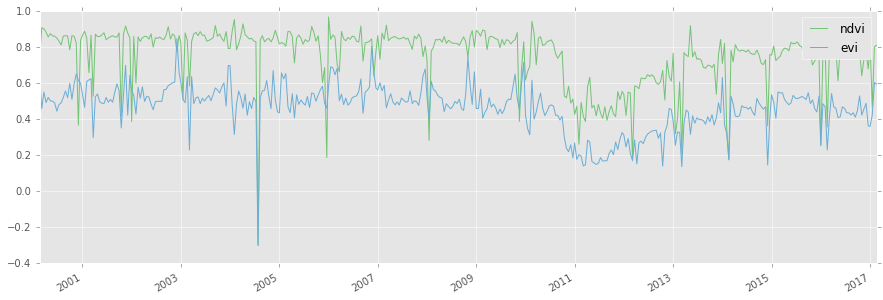

In [5]:
%matplotlib inline
import matplotlib
from cycler import cycler
matplotlib.style.use('ggplot')
# Updating default matplotlib colors
colors = cycler(u'color', [u'#74c476',u'#6baed6',u'#d62728', \
                           u'#ff7f0e', u'#756bb1'])
matplotlib.rcParams['axes.prop_cycle'] = colors
# Time series visualization
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
ax.legend()
fig.autofmt_xdate()

## Data analysis
<hr style="border:1px solid #0077b9;">

### Line fitting
<hr>

A simple way to reveal coarse trends in time series is to adjust a straight line through the data. 

In the code below, we have a function to fit lines which we use in our time series. Then we plot the vegetation indexes along the adjusted lines.

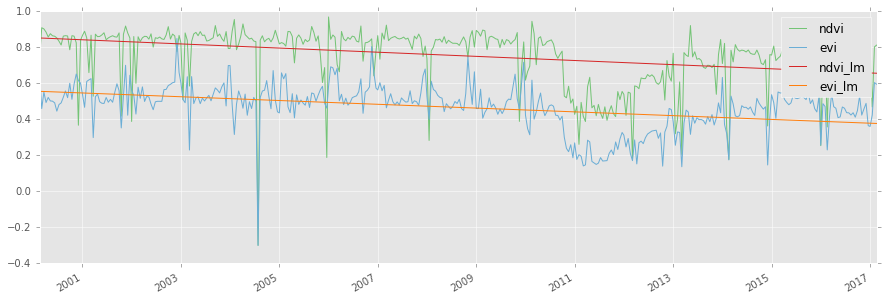

In [6]:
from linearmodel import *
# fit a line to the vegetation indexes
vidf['ndvi_lm'] = fitline(vidf['ndvi'])
vidf['evi_lm'] = fitline(vidf['evi'])
# plot
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
vidf['ndvi_lm'].plot()
vidf['evi_lm'].plot()
ax.legend()
fig.autofmt_xdate()
#vidf[0:5]

### Fourier decomposition
<hr>
Fourier series analysis decomposes time series into sums of periodic functions (waves). These functions have properties such as amplitude, wavelength, and frequency. 

High frequencies are often associated with noise. Therefore, to diminish noise, we remove high frequencies from our time series. The use of Fourier series to estimate vegetation phenology was addresed by Atkinson [[Atkinson2012]](#references).

In the following example, we use our implementation of the Fourier filter function which takes as parameter a time series and the number of low frequencies to keep.

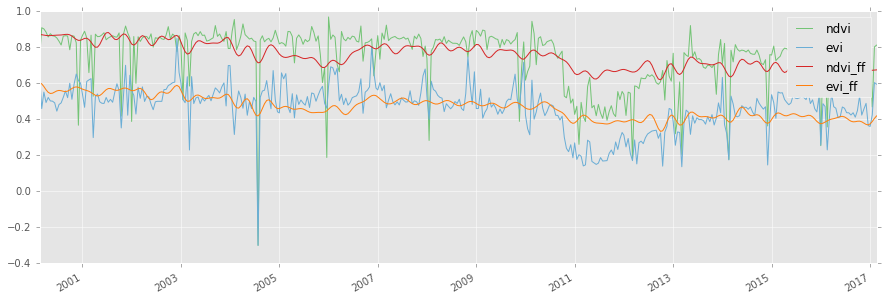

In [7]:
from fourier import *
# filter the vi
vidf['ndvi_ff'] = fourierfilter(vidf['ndvi'], 50)
vidf['evi_ff'] = fourierfilter(vidf['evi'], 50)
# plot
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
vidf['ndvi_ff'].plot()
vidf['evi_ff'].plot()
ax.legend()
fig.autofmt_xdate()
#vidf[0:5]

### Whittaker smoothing
<hr>

Whitakker filter is a linear combination of time series' nearest neighbors points [[Eilers2003]](#references). This filter is useful for estimating vegetation phenology[[Atkinson2012]](#references).

In the following example, we use our implementation of Whittaker to smooth our sample time series.

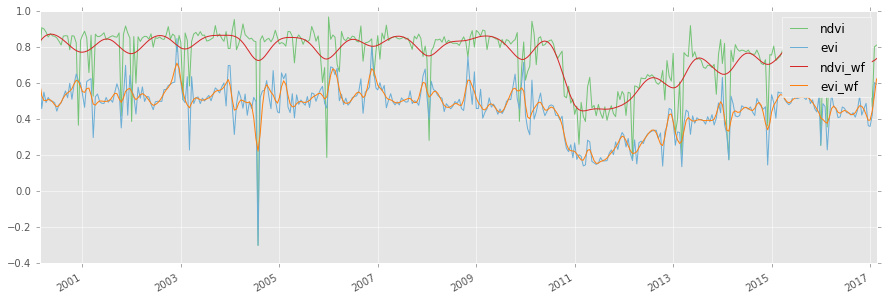

In [8]:
from whittaker import *
# filter the vi
vidf['ndvi_wf'] = pd.Series(whittaker_filter(ndvi,1000), index = ts.timeline)
vidf['evi_wf']  = pd.Series(whittaker_filter(evi,1), index = ts.timeline)
# plot
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
vidf['ndvi_wf'].plot()
vidf['evi_wf'].plot()
ax.legend()
fig.autofmt_xdate()
#vidf[0:5]

### Kalman filter
<hr>

The Kalman filter aims to separate time series from noise. It is an iterative algorithm on which the outputs of one iteration are the inputs for the next one. In this way, the filter successively improves its estimations of the true value of a time series. 

In the example below, we estimate the initial parameters for the filter from the time series itself. Then we compute the Kalman filter and plot the smoothed vegetation indexes.

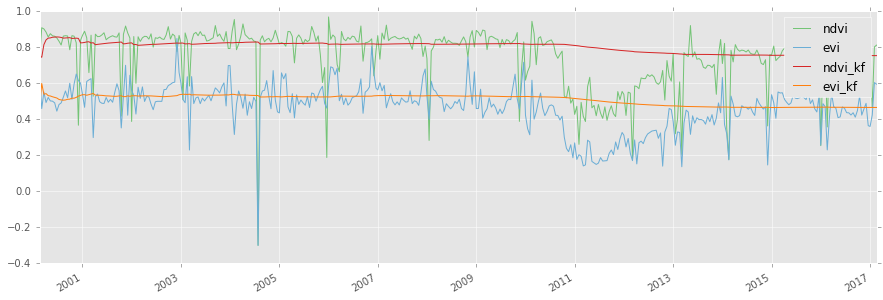

In [9]:
from kalman import *
# filter the vi
vidf['ndvi_kf'] = pd.Series(kalmanfilter(ndvi), index = ts.timeline)
vidf['evi_kf']  = pd.Series(kalmanfilter(evi), index = ts.timeline)
# plot
fig, ax = matplotlib.pyplot.subplots(figsize = (15, 5))
ax.plot()
vidf['ndvi'].plot()
vidf['evi'].plot()
vidf['ndvi_kf'].plot()
vidf['evi_kf'].plot()
ax.legend()
fig.autofmt_xdate()
#vidf[0:5]

## Classification
<hr style="border:1px solid #0077b9;">

### Dynamic Time Warping
<hr>

Dynamic Time Warping (DTW) is pattern matching algorithm. It relies on a shape-based distance function that sequentially warps the time dimension in order to find the best match &#8212; the minimum the distance &#8212; between two time series: The pattern and the sample series. Below we show how to classify time series using DTW.

#### Patterns

Our patterns are idealized one-year time-series of the [Forest](Forest) and the [Cerrado](https://en.wikipedia.org/wiki/Cerrado) regions in Brazil.  These patterns were obtained using a [Generalized Additive Model](https://en.wikipedia.org/wiki/Generalized_additive_model) over a large amount of selected time series.

Below we show how to read and plot the aforementioned patterns.

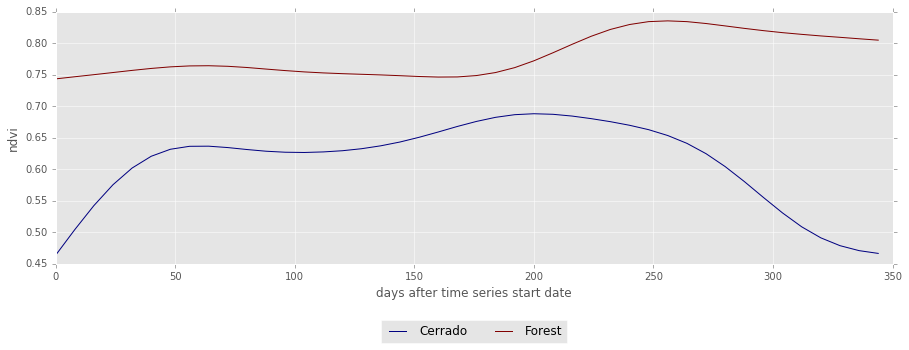

In [10]:
from dtw import *
from tools import *

# open the pattern file
patterns_ts = pd.read_json("examples/patterns.json", orient='records')
# update timeline type from str to datetime
patterns_ts["timeline"] = pd.to_datetime(patterns_ts["timeline"])
plot_time_series(patterns_ts)

#### Samples

We have a file of sample locations which we would like to classify using the patterns listed above. For the sake of this example, we already know that these locations belong to either the Forest or Cerrado region. These ten locations are in the Brazilian state of Mato Grosso and they were verified on the field.

Below we read the file with the sample locations.

In [11]:
# read sample file
samples = pd.read_csv("examples/samples.csv")
samples

,id,longitude,latitude,start_date,end_date,label
0,0,-54.231300,-14.048200,2014-09-14,2015-08-29,Cerrado
1,1,-54.229000,-14.063200,2014-09-14,2015-08-29,Cerrado
2,2,-55.209200,-15.114600,2014-09-14,2015-08-29,Cerrado
3,3,-55.352700,-15.073900,2014-09-14,2015-08-29,Cerrado
4,4,-55.324200,-15.076000,2014-09-14,2015-08-29,Cerrado
5,5,-51.241157,-14.070312,2013-09-14,2014-08-29,Forest
6,6,-49.415758,-22.544512,2013-09-14,2014-08-29,Forest
7,7,-51.286030,-13.655227,2013-09-14,2014-08-29,Forest
8,8,-50.655128,-12.430256,2013-09-14,2014-08-29,Forest
9,9,-51.257672,-14.213212,2013-09-14,2014-08-29,Forest


Now, we get the time series of MODIS data of these locations. We do this in the background using WTSS python client.

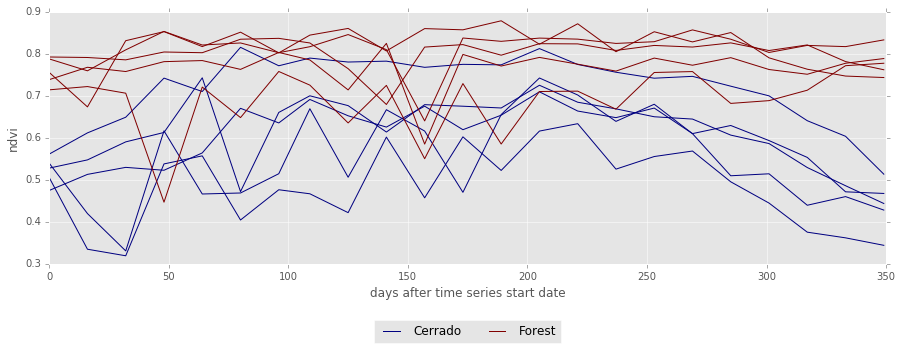

In [12]:
# wtss_get_time_series is implemented in 'tools.py'
samples_ts = wtss_get_time_series(samples)

# rescale vegetation index to -1.0~1.0 range
samples_ts["ndvi"] *= cv_scheme['attributes']['ndvi']['scale_factor']
samples_ts["evi"] *= cv_scheme['attributes']['evi']['scale_factor']

samples_ts[0:5]
plot_time_series(samples_ts)

#### Classification

It is time to classify the sample locations using our patterns. We do this by computing the DTW distance from each pattern to each sample. Then we assign to each sample the name of the pattern with the minimum DTW distance.

To achieve this, we use the code below.

In [13]:
# classify using DTW
classification = classifier_1nn(patterns_ts, samples_ts)

# print the classification rersults
classification

,id,reference,prediction,correct
0,0,Cerrado,Cerrado,True
1,1,Cerrado,Cerrado,True
2,2,Cerrado,Cerrado,True
3,3,Cerrado,Forest,False
4,4,Cerrado,Cerrado,True
5,5,Forest,Forest,True
6,6,Forest,Forest,True
7,7,Forest,Forest,True
8,8,Forest,Forest,True
9,9,Forest,Forest,True


#### Classification results

The results above prove that DTW and our patterns do a good job. We managed to correctly classify 9 out of ten time series. However, the sample location number 3 is incorrectly classified as it is Cerrado but it was assigned to the Forest label.

To find what happened, we plot the Forest and Cerrado patterns along the time series of the sample location number three. We can see there how this sample doesn't fit very well to either of the two patterns.

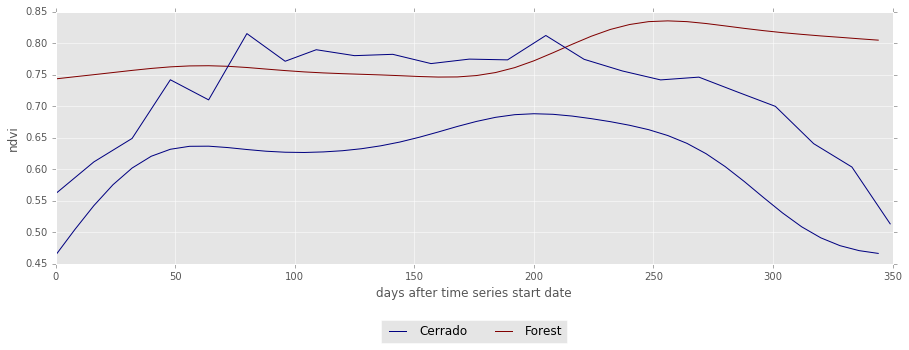

In [14]:
# let see what happened with sample #3
plot_time_series(pd.concat([samples_ts[samples_ts["id"].isin([3])], patterns_ts]))

# Final remarks
<hr style="border:2px solid #0077b9">
We introduced the Web Time Series Service (WTSS), a light weight Web Service of time series of Earth observation data. Through examples and code, we show how the WTSS is used and integrated to Python's scientific libraries such as NumPy, SciPy and Pandas. Therefore, we demonstrated how WTSS fits into the analytic work flow of Earth Observation Scientists.

# What are the constraints of WTSS? What is missing?
- So far, our WTSS implementation only provides data from MODIS __[MOD13Q1](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1)__
- The WTSS interface is still simple, we need to extend the service in order to serve complex applications
- Regarding Map Algebra, WTSS enables local operations. We need to extend it to focal, zonal and global operations.
- WTSS is about time series analysis. But we still need to see cubes of satellite data as images. In other words, we need the equivalent of Web Mapping Server, Web Feature Service, and Web Coverage Server for big Earth observation data.
- Our Array database cluster (SciDB) is slow for retrieving images and it does not have native support for the spatio-temporal metadata associated with Earth observation imagery

Finally, we would like to invite you to explore some results of the **e-sensing** project by clicking __[here](http://terrabrasilis.info/composer/E-SENSING)__. We are working on new features of WTSS and also a new Web Service for processing large amounts of Earth observation data.

# Source code

The examples introduced here rely on open source python modules. Our code is available here:
- Map
  - [tsmap.py](./tsmap.py) Display maps in Jupyter notebooks.
- Filter
  - [linearmodel.py](./linearmodel.py) Fit linear models to time series.
  - [fourier.py](./fourier.py) Filter time series using the Fast Fourier Transformation.
  - [kalman.py](./kalman.py) Filter time series using the Kalman filter.
  - [whittaker.py](./whittaker.py) Filter time series using the whittaker smoother.
- Classification. DTW relies in the following modules: 
  - [dtw.py](./dtw.py) Implementation of Dynamic Time Warping.
  - [tools.py](./tools.py) Utilitary functions for retrieving and plotting time series.

# References
<hr style="border:2px solid #0077b9">
<a id="references"></a>

[Atkinson2012]: P. M. Atkinson, C. Jeganathan, J. Dash, and C. Atzberger, “Inter-comparison of four models for smoothing satellite sensor time-series data to estimate vegetation phenology,” Remote Sens. Environ., vol. 123, pp. 400–417, Aug. 2012.

[Eilers2003]: Paul H. C. Eilers. "A Perfect Smoother". Analytical Chemistry, 2003, 75 (14), pp 3631–3636.


[Vinhas2016]: L. Vinhas; G. R. Queiroz; K. R. Ferreira; Camara, G. [Web Services for Big Earth Observation Data](http://urlib.net/8JMKD3MGP3W34P/3N2U9JL). In: BRAZILIAN SYMPOSIUM ON GEOINFORMATICS, 17. (GEOINFO), 2016, Campos do Jordão, SP. Proceedings... 2016.

# Obrigado!
<br>
<br>
<br>
<center>https://github.com/e-sensing/wgiss-py-webinar</center>
<br>
<br>
<br>
<p style="text-align:right;">
Alber Sánchez<br> 
alber.ipia @ inpe.br
</p>